In [ ]:
from google.colab import files
uploaded = files.upload()
# Uploading a file from the local system

Saving marksheet.csv to marksheet.csv


In [ ]:
import pandas as pd
df = pd.read_csv('marksheet.csv')
# Reading the uploaded CSV file into a DataFrame and
df.head()
# displaying the first few rows of the dataset

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33
4,5,Jocelin,Male,14,A,43,6,3,21


In [ ]:
df['Total'] = df['Science']+df['English']+df['History']+df['Maths']
# Adding a new column 'Total' by summing the marks in Science, English, History, and Maths

In [ ]:
df.head()

,id,Name,Gender,Age,Section,Science,English,History,Maths,Total
0,1,Bronnie,Female,13,C,21,81,62,49,213
1,2,Lemmie,Male,15,B,29,41,17,40,127
2,3,Danya,Female,14,C,12,87,16,96,211
3,4,Denna,Female,14,B,15,53,82,33,183
4,5,Jocelin,Male,14,A,43,6,3,21,73


In [ ]:
df.groupby('Section').describe()
# Displaying statistical descriptions of grouped sections (A, B, C)

id                                                           Age  \
        count        mean        std  min    25%    50%    75%    max count   
Section                                                                       
A        79.0  123.455696  67.836114  5.0  71.00  117.0  184.5  239.0  79.0   
B        79.0  122.670886  77.084157  2.0  51.00  129.0  186.5  250.0  79.0   
C        92.0  129.684783  72.406048  1.0  67.75  133.0  192.0  246.0  92.0   

                    ...  Maths        Total                               \
              mean  ...    75%    max count        mean        std   min   
Section             ...                                                    
A        14.050633  ...  75.00   97.0  79.0  208.253165  58.161461  73.0   
B        13.898734  ...  77.00  100.0  79.0  209.962025  58.428884  67.0   
C        14.097826  ...  75.25  100.0  92.0  197.152174  62.073323  57.0   

                                      
           25%    50%     75%    max  
Section                               
A        164.5  209.0  246.00  356.0  
B        177.0  207.0  252.00  333.0  
C        150.5  197.5  243.25  361.0  

[3 rows x 56 columns]

In [ ]:
ma = 208.253165
sa = 58.161461
mb = 209.962025
sb = 58.428884
mc = 197.152174
sc = 62.073323
# Mean (m) and standard deviation (s) values for each section: A, B, and C

In [ ]:
def assign_grade(total, mn, sn):
    if total >= mn + sn:
        return 'A'
    elif total >= mn + (0.5*sn):
        return 'B'
    elif total >= mn:
        return 'C'
    elif total>=mn - (0.5*sn):
        return 'D'
    else:
        return 'F'
# Function to assign grades based on total marks using standard deviation thresholds

In [ ]:
# Filtering students of section A, B, and C into separate DataFrames

In [ ]:
adf=df[df['Section']=='A']


In [ ]:
bdf=df[df['Section']=='B']

In [ ]:
cdf=df[df['Section']=='C']

In [ ]:
# Applying the assign_grade function to calculate grades for students in each section

In [ ]:
adf['Grade'] = adf['Total'].apply(lambda total: assign_grade(total, ma, sa))

<ipython-input-94-741ca20b3745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Grade'] = adf['Total'].apply(lambda total: assign_grade(total, ma, sa))


In [ ]:
bdf['Grade'] = bdf['Total'].apply(lambda total: assign_grade(total, mb, sb))

<ipython-input-95-19de0ec276b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf['Grade'] = bdf['Total'].apply(lambda total: assign_grade(total, mb, sb))


In [ ]:
cdf['Grade'] = cdf['Total'].apply(lambda total: assign_grade(total, mc, sc))

<ipython-input-96-f9441f5bf6ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Grade'] = cdf['Total'].apply(lambda total: assign_grade(total, mc, sc))


In [ ]:
df = pd.concat([adf, bdf, cdf], ignore_index=True)
# Concatenating the three sections back into a single DataFrame

In [ ]:
df.head(125)

,id,Name,Gender,Age,Section,Science,English,History,Maths,Total,Grade
0,5,Jocelin,Male,14,A,43,6,3,21,73,F
1,9,Corrine,Male,15,A,39,16,22,49,126,F
2,13,Merrick,Male,15,A,65,89,96,34,284,A
3,16,Gilberta,Male,15,A,53,30,90,64,237,C
4,17,Peggy,Male,13,A,91,45,44,45,225,C
...,...,...,...,...,...,...,...,...,...,...,...
120,135,Humfrid,Female,13,B,96,100,42,62,300,A
121,139,Bevan,Male,13,B,52,62,44,10,168,F
122,140,Ricky,Female,13,B,21,65,90,4,180,F
123,142,Emmanuel,Female,14,B,77,79,92,36,284,A


In [ ]:
import seaborn as sns

<Axes: xlabel='Total', ylabel='Count'>

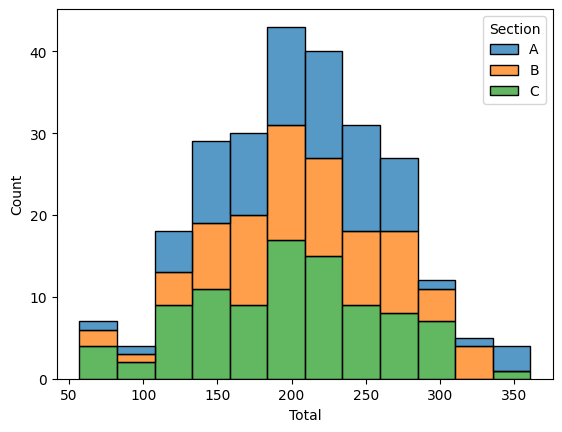

In [ ]:
sns.histplot(data=df, x='Total', hue='Section', multiple='stack')
# Plotting a histogram of 'Total' marks, with different colors for each 'Section'

<Axes: xlabel='Total', ylabel='Count'>

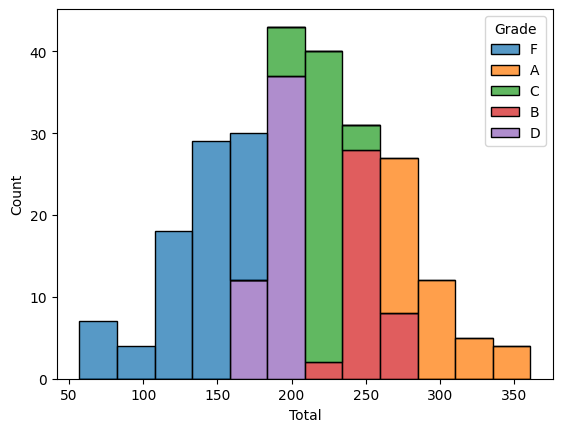

In [ ]:
sns.histplot(data=df, x='Total', hue='Grade', multiple='stack')
# Plotting a histogram of 'Total' marks, with different colors for each 'Grade'

<Axes: xlabel='Total', ylabel='Density'>

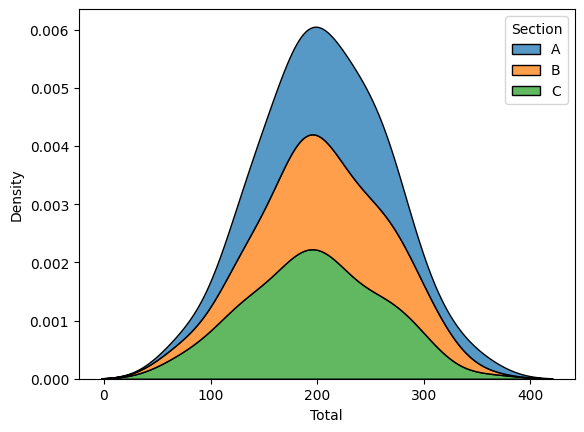

In [ ]:
sns.kdeplot(data=df, x='Total', hue='Section', multiple='stack')
# Kernel Density Estimate (KDE) plot of 'Total' marks with sections stacked by color

<Axes: xlabel='Total', ylabel='Density'>

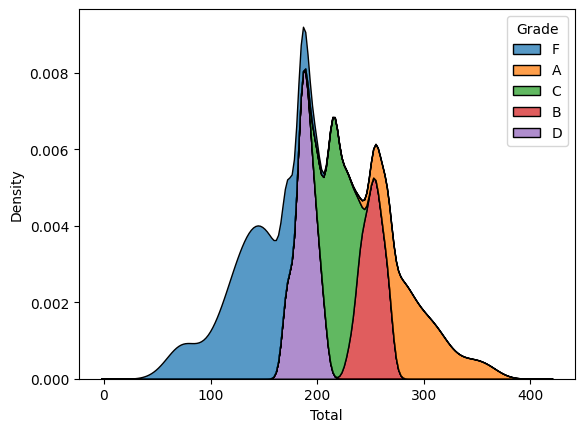

In [ ]:
sns.kdeplot(data=df, x='Total', hue='Grade', multiple='stack')
# KDE plot of 'Total' marks, with colors representing grades

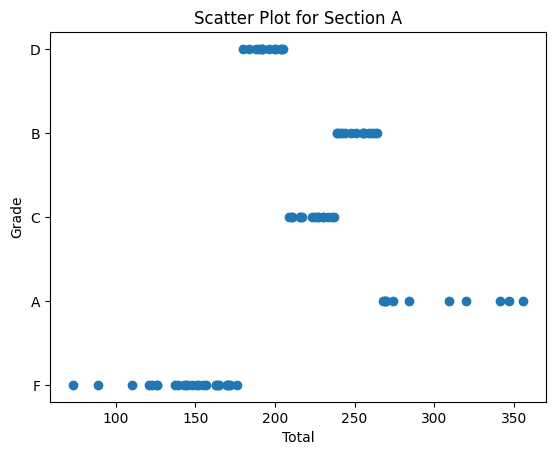

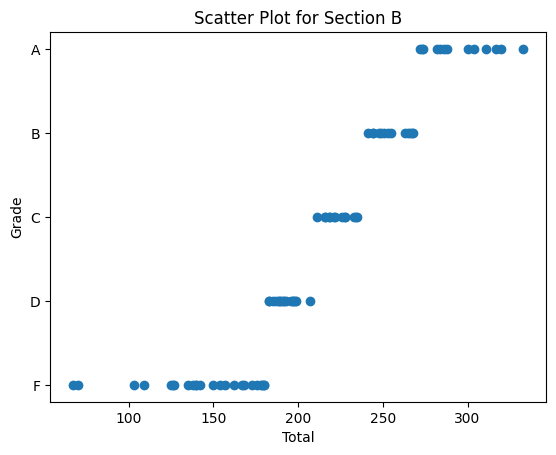

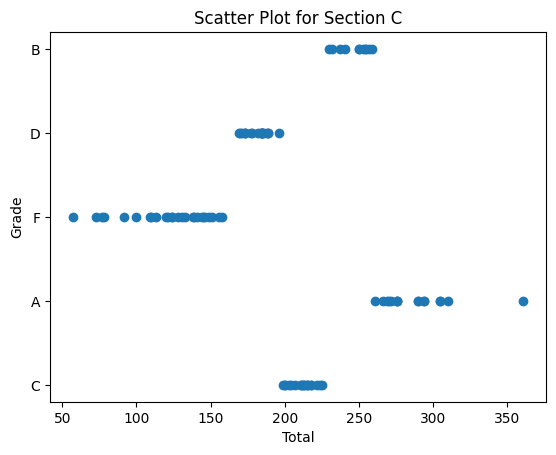

In [ ]:
import matplotlib.pyplot as plt


for section in df['Section'].unique():
  section_df = df[df['Section'] == section]
  plt.scatter(section_df['Total'], section_df['Grade'])
  plt.title(f'Scatter Plot for Section {section}')
  plt.xlabel('Total')
  plt.ylabel('Grade')
  plt.show()

# Scatter plot for each section, showing 'Total' marks against the assigned 'Grade'

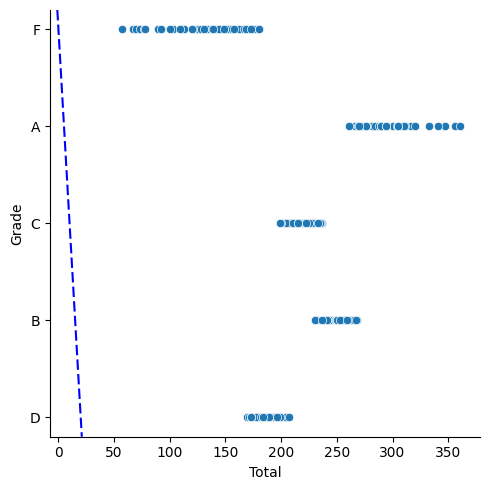

In [ ]:
g = sns.relplot(data = df, x="Total", y="Grade")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))
# Relational plot showing the relationship between 'Total' marks and 'Grade'

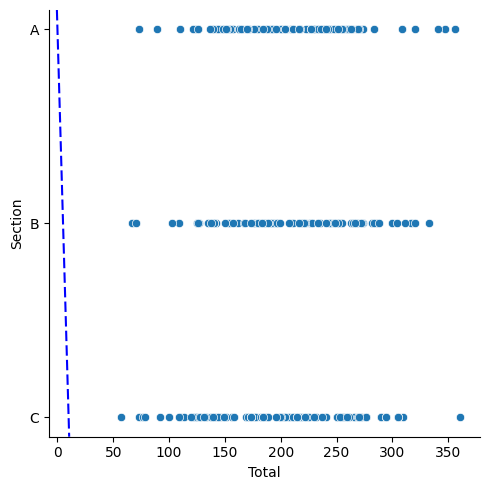

In [ ]:
g = sns.relplot(data = df, x="Total", y="Section")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))
# Relational plot showing the relationship between 'Total' marks and 'Section'

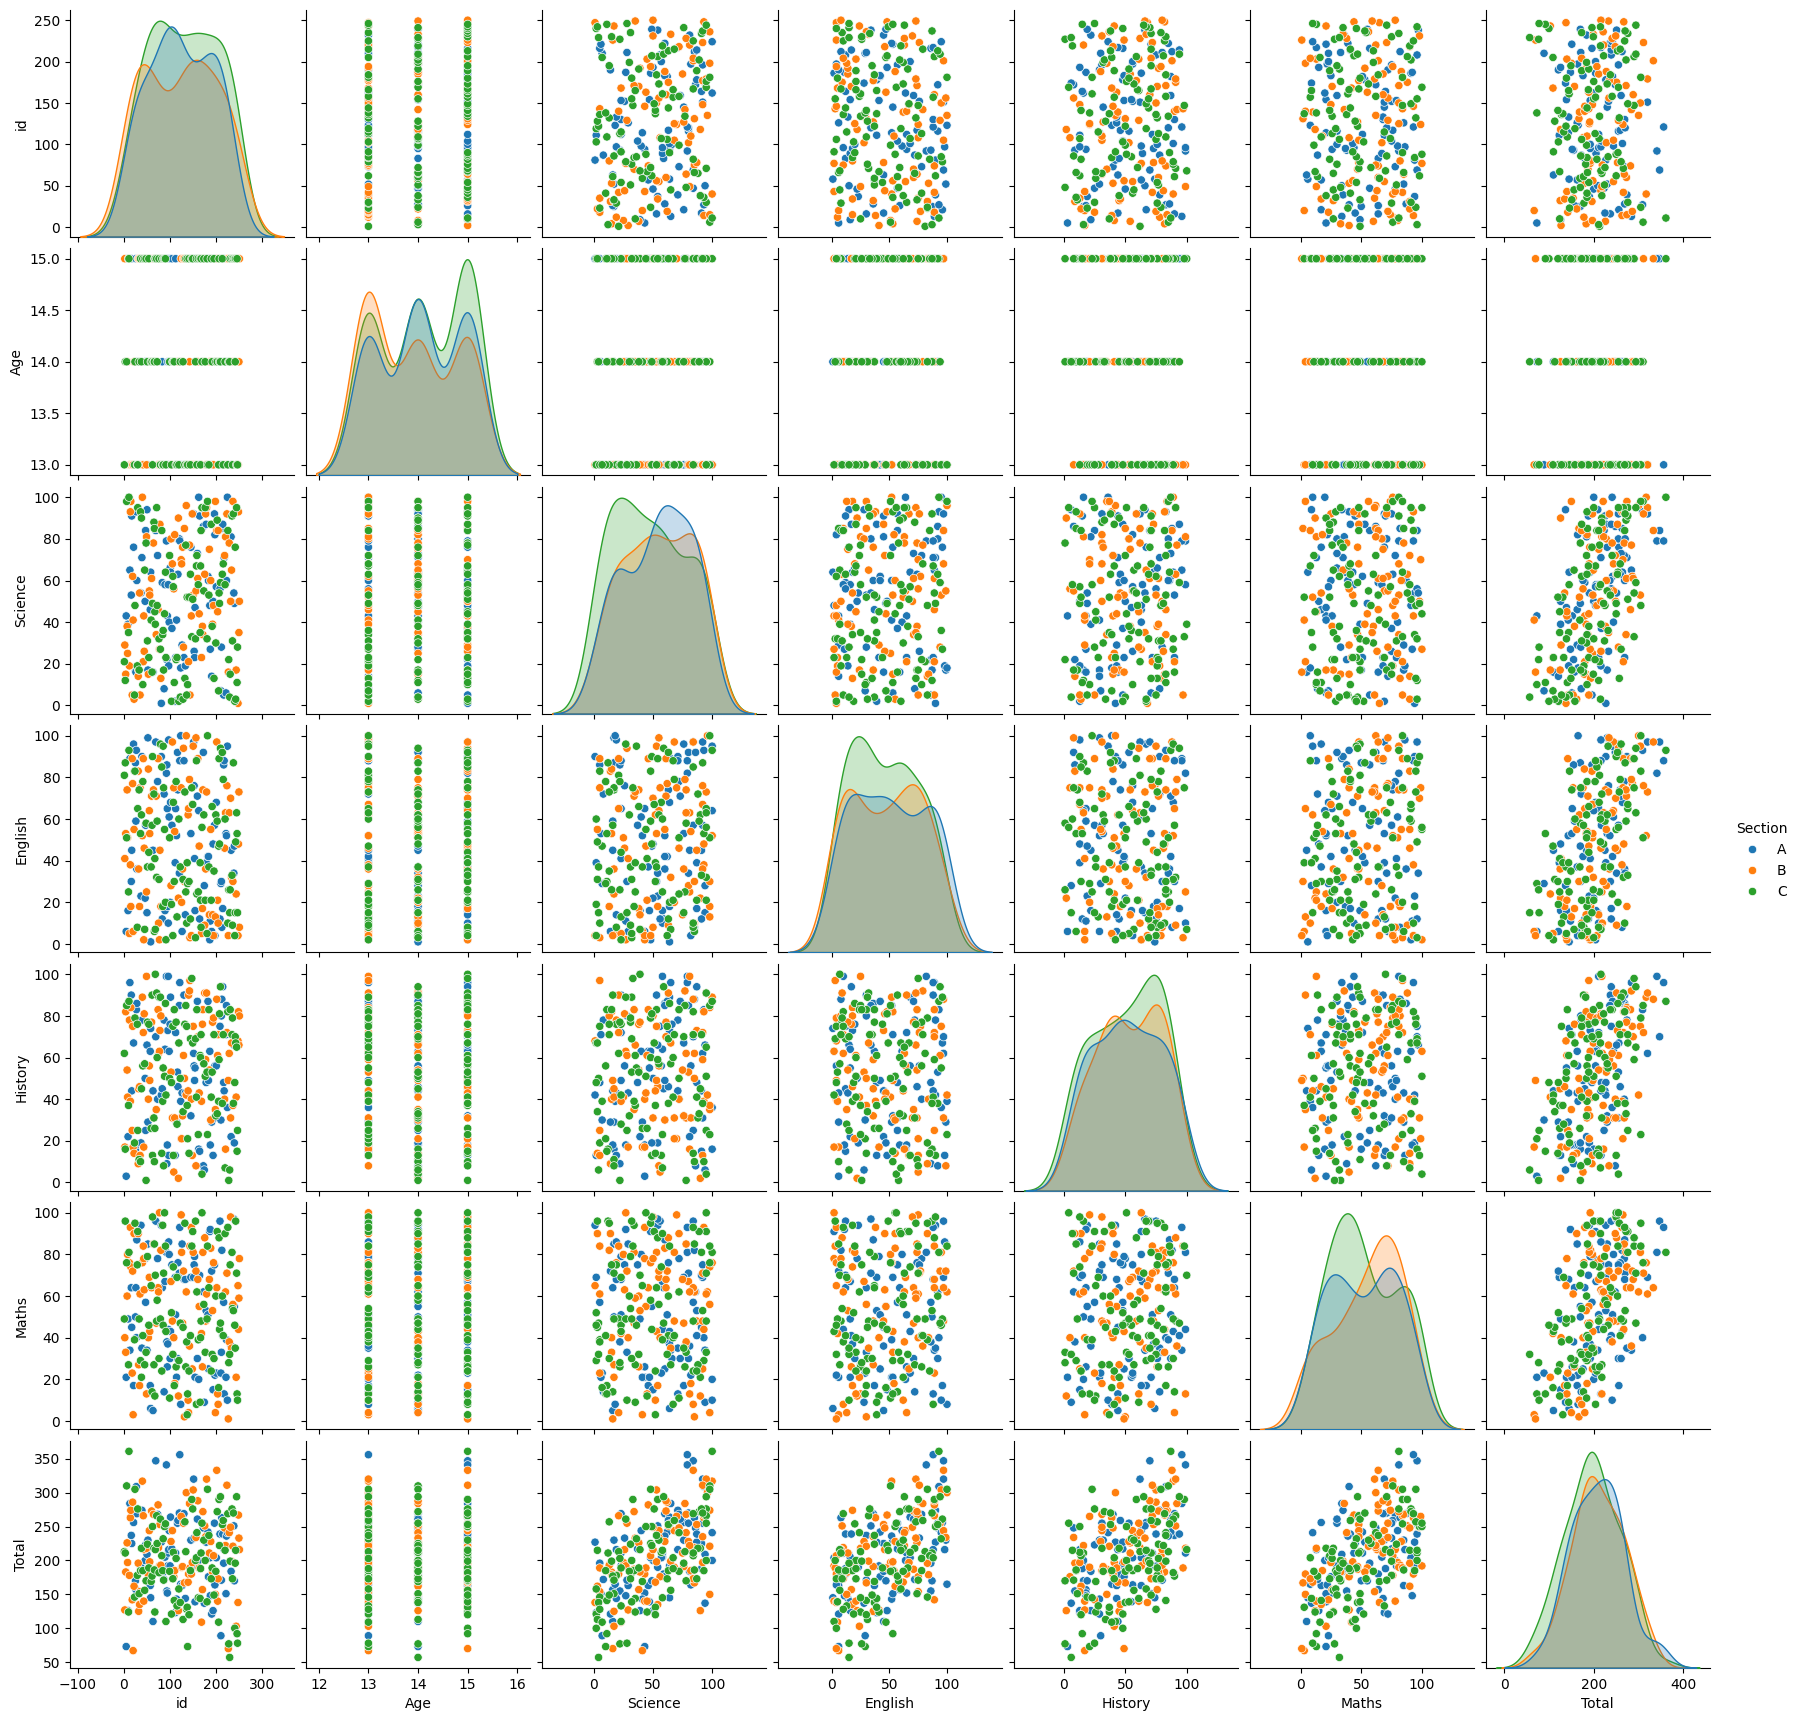

In [ ]:
sns.pairplot(data=df, hue="Section")
# Pair plot showing relationships between numeric columns, with hue as 'Section'

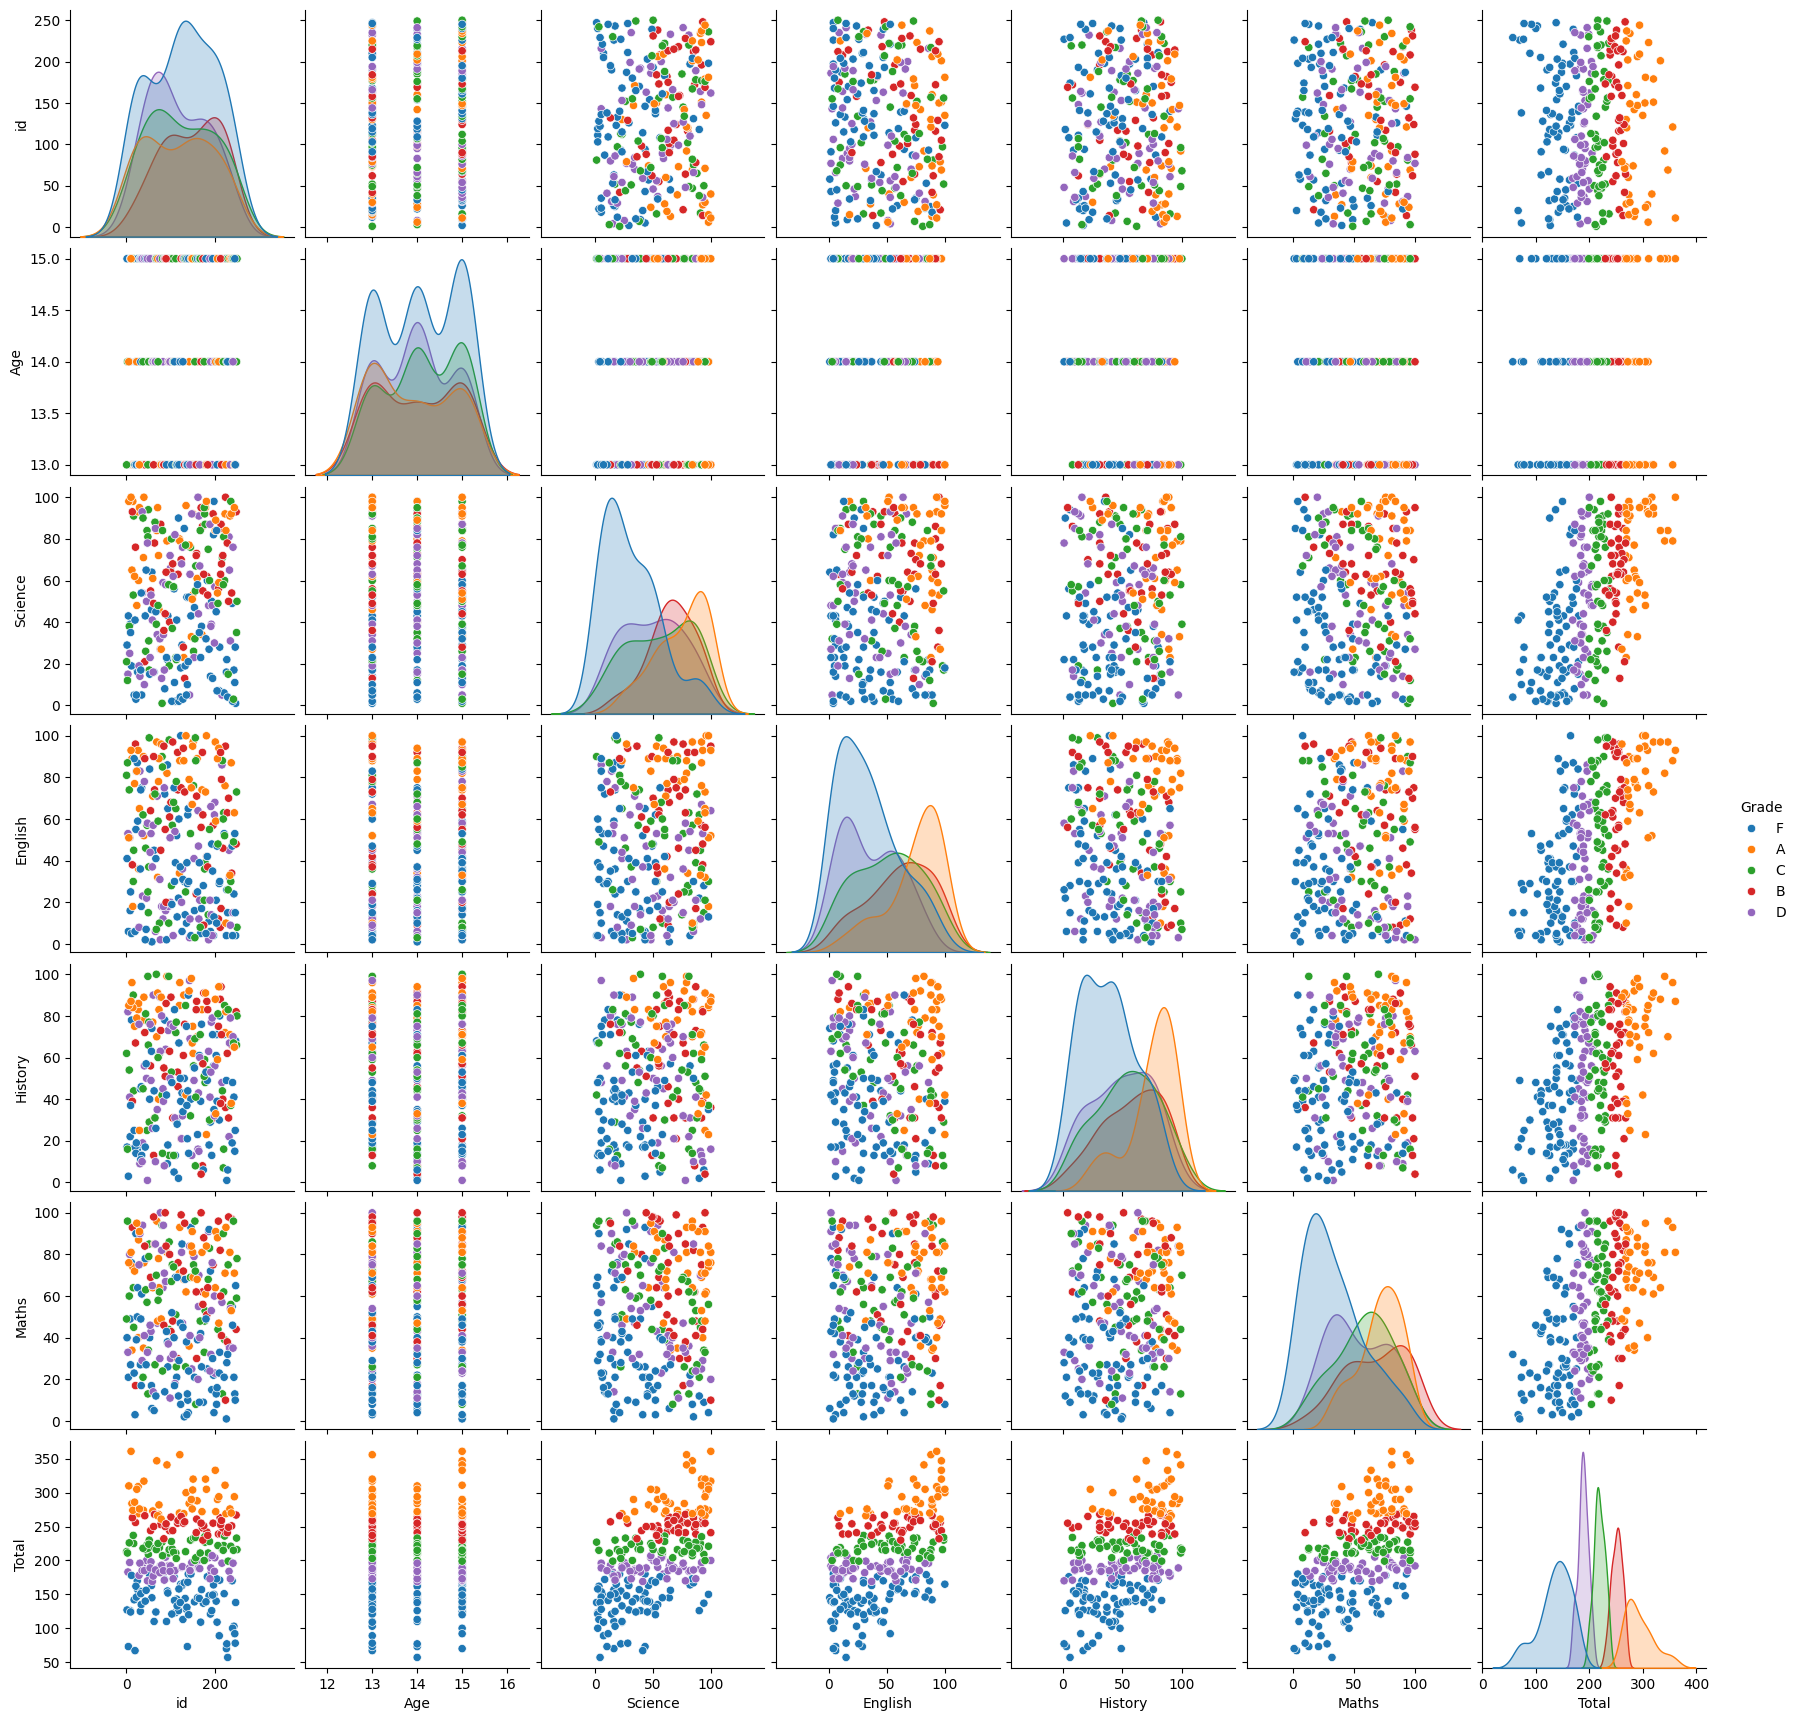

In [ ]:
sns.pairplot(data=df, hue="Grade")
# Pair plot showing relationships between numeric columns, with hue as 'Grade'

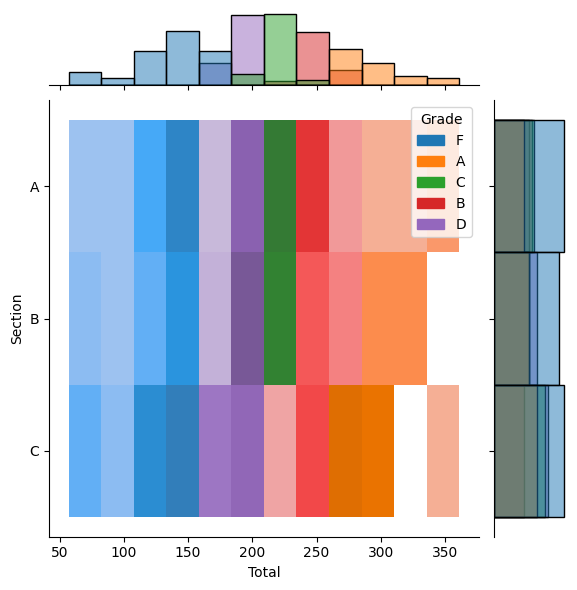

In [ ]:
sns.jointplot(data=df, x="Total",y = "Section", hue="Grade", kind="hist")
# Joint plot (histogram) of 'Total' marks and 'Section', with hue as 'Grade'

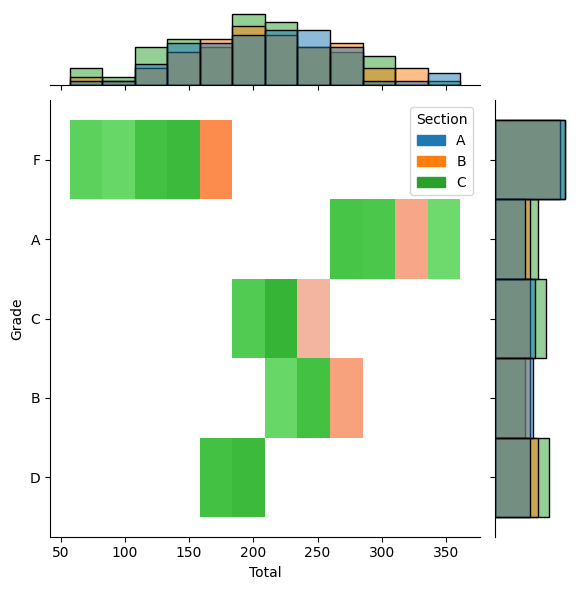

In [ ]:
sns.jointplot(data=df, x="Total",y = "Grade", hue="Section", kind="hist")
# Joint plot (histogram) of 'Total' marks and 'Grade', with hue as 'Section'

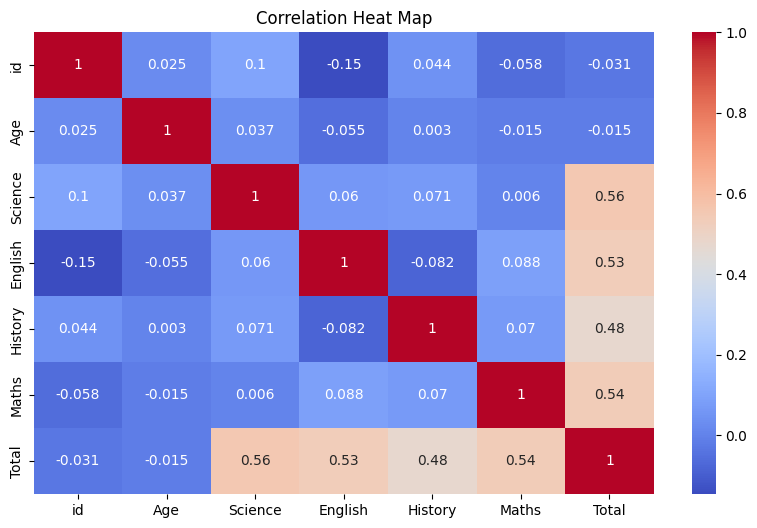

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()
# Correlation heatmap to show relationships between numeric variable

([<matplotlib.patches.Wedge at 0x7b00283b7ac0>,
 [Text(1.0999889552017403, 0.004929344194099692, ''),
  Text(1.0998466652824268, 0.018366079252943063, ''),
  Text(1.099036130804769, 0.04603893119614083, ''),
  Text(1.097001896195357, 0.08115934785218155, ''),
  Text(1.0942593224692148, 0.11223428704818973, ''),
  Text(1.0904688774421318, 0.1444909247326523, ''),
  Text(1.086317913048615, 0.1729548836827168, ''),
  Text(1.0826274830125802, 0.19472476223081103, ''),
  Text(1.0766149607073079, 0.2256107851615303, ''),
  Text(1.0679339875909173, 0.2636607633838654, ''),
  Text(1.0600820237226811, 0.29364281530462355, ''),
  Text(1.0512891880093835, 0.32371444696610535, ''),
  Text(1.0414262769707092, 0.3541628292677365, ''),
  Text(1.031879820120551, 0.38108271651700415, ''),
  Text(1.021412213864481, 0.4083100407392159, ''),
  Text(1.0100392045121909, 0.43568429550349985, ''),
  Text(0.9992354181755712, 0.45992236199546943, ''),
  Text(0.9903615234419074, 0.4787317128474199, ''),
  Text(0

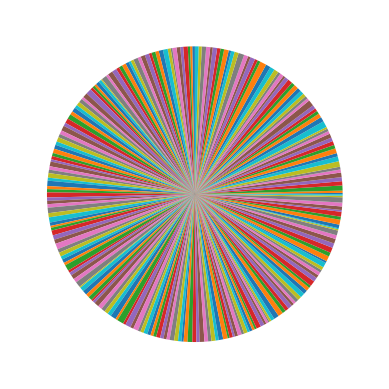

In [ ]:
plt.pie(df['Total'])